In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv


# Logistic Regression with Python in Machine Learning - Titanic Dataset
Logistic Regression is a Classification Algorithym used to assign observations to a discrete set of classes. In linear we having continuous observations but in logistic regresssion we have 0 and 1 and True / False. logistic regression transforms it output using the logistic sigmid function to return a probability value. if probability is greater than 0.5 will predict it towards 1. Ex - rain forecasting, fraud detection, cancer detection, spam mail or not.

# TITANIC DATA INFORMATION -
The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died.

# Lets go ahead and build a model which can predict if a passenser is gonna survive

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Importing train and test data.

train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [5]:
# before doing any analysis we will check our data that it imported properly or not.

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.shape

(418, 11)

In [7]:
train_data.shape

(891, 12)

In [8]:
# as can see train_data having 891 unique values with 12 feature. and test_data having 418 unique values with 11 feature.
# in test_data one feature is not included "survived" which is DV and we need to identify.
# for doing further few cleaning and munging i am combining both data.

In [9]:
titanic = [train_data, test_data]

In [10]:
# checking train columns

train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Explanation of all features

### PassengerId - Unique ID of the passenger

### Survived - Survived (1) or died (0)

### Pclass - Passenger's class (1st, 2nd, or 3rd)

### Name- Passenger's name

### Sex- Passenger's sex

### Age - Passenger's age

### SibSp - Number of siblings/spouses aboard the Titanic

### Parch - Number of parents/children aboard the Titanic

### Ticket- Ticket number

### Fare - Fare paid for ticket

### Cabin - Cabin number

### Embarked - Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)

In [11]:
train_data.info()

print("------------------------------------------")

test_data.info()

# Information collected from info - 
#Seven features are integer or floats. Six in case of test dataset.
#Five features are strings (object).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-nu

In [12]:
# from above ingormation can see there is null value in data. lets check by once again by using isnull 
train_data.isnull().sum() 

# Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
# Cabin > Age are incomplete in case of test dataset.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
# Checking some statistics information about data

train_data.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#  Information Gained from describe -
- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

In [15]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Maioni, Miss. Roberta",male,1601,G6,S
freq,1,577,7,4,644


# Understanding of describe from categorical feature

- Names are unique acroos the dataset (count = 891)
- Sex variable as two possible values with 65% male(top = male, freq = 577 / count = 891)
- Cabin values have several duplicate across samples. freq = 4
- Embarked take 3 possible values. S port used by most passenger (top = s)
-Ticket feature has high ratio(22 %) of duplicate values (unique = 681 , count = 891)

In [16]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
test_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Peacock, Mrs. Benjamin (Edith Nile)",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


# # Understanding of describe from categorical feature
-Names are unique across the dataset (count=unique=418)

-Sex variable as two possible values with 63% male (top=male, freq=266/count=418).

-Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.

-Embarked takes three possible values. S port used by most passengers (top=S)

-Ticket feature has high ratio (13%) of duplicate values (unique=363).

# Assumptions based on Data Analysis
### now i would like to check coorelation of all features with survival to check is there any linear correlation or not. 
### is there any multicollineaity between predictors.
### also fill missing value in some features.
### do required encoding for categorical feature.
### if needed do feature scaling too
### as ticket feature contains high ratio of duplicates(22%) may be can drop this.
### cabin feature may be dropped as it having many null values both in training and test dataset.
### PassengerId not useful for giving any information so drop this.
### Name feature also not directly corelated to survival, so can drop this too.
### can create some new feature based on class, Fare Range, family which include detail of person and sibling . children.
### can crete new feature as "Title" and adjust all name based on the title.
### classify category based on female as we know already female survive mostly.
### need to find out range of children age who survived by classifying them.
### we knew also upper class passenger survived mostly, also high fair paid passenger survived mostly.


In [18]:
# Lets create some pivot to see more detail analysis

In [19]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
# as shown from above pivot female are most likely to survived around(74%)of given data.

In [22]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False ).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [23]:
# passenger who is trvelling with one sibling have chances to survived (53%) compared to passenger who have more than one family member.

In [24]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index = False ).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Visualizaton of Data

In [25]:
# Correlating numerical features 
#I will use Histogram chart for analyzing continuous numerical variable like age.

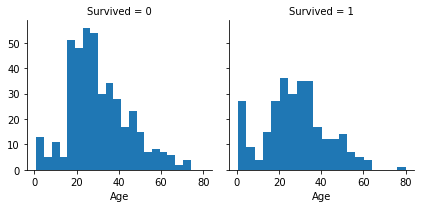

In [26]:
g = sns.FacetGrid(train_data, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

# Explanation of age histogram based on survival
- Survived = 1 and nonsurvived = 0
- age of 80 survived.
- non survival passenger are mostly from age group 15-30.
- maximum number of passenger who boarded from age group 15-35 age range.
    

# Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values

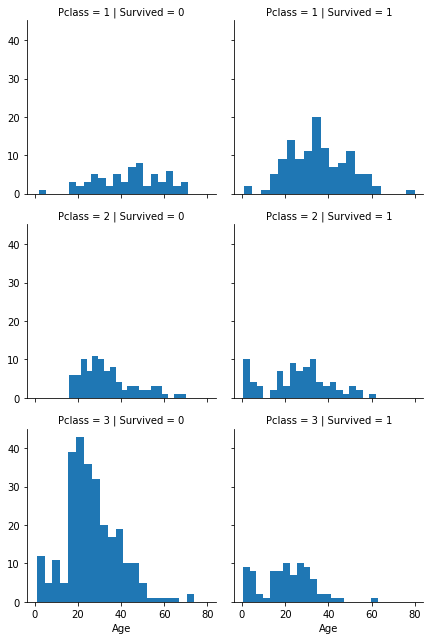

In [27]:
g = sns.FacetGrid(train_data, col = 'Survived', row = 'Pclass')
g.map(plt.hist, 'Age', bins = 20)
g.add_legend()

# Explanation of above histogram 
- Survival number is much higher in case of PClass 1.
- most unsurvived passenger belongs to Pclass 3.
- mostly infant passenger belongs to Pclass 1, 2 and survived 
- major number of passenger between age group 15-30 boarded in PClass 3 and non survived too.

# Correlating Categorical Feature

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


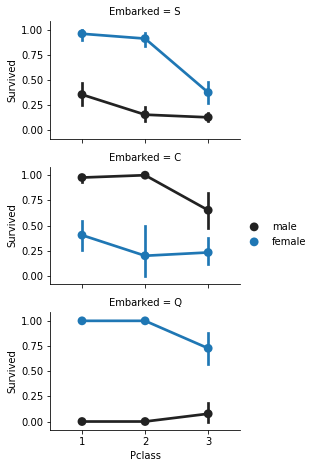

In [28]:
grid = sns.FacetGrid(train_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

# Observations from above correlation
- In this graph checked passenger board place (C - Cherbourg, S - Southampton, Q = Queenstown) correlation with survival
- passenger who boarded from Cherbourg and part of passenger class 1have more male survival rate.
- from Southampton more female survived with passenger class 1,2.
- in all board place female have higher survival rate.

# Correlating categorical and numerical features
# Bar plot

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


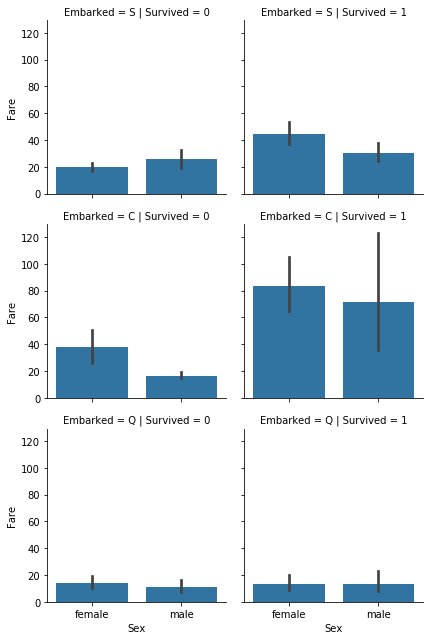

In [29]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend()

# Assumptions based on above graph between survival and Embarked
- Cherbourg passenger paid higher fare and survived to. Female have higher survival than male.
- Queenstown passenger have equal proprotion of survival and non survival.
- Port of embarkation correlates with survival rates. and its shows correlation with survival****

# Removing some feature
Now after understanding data by making differnt assumptions checking through visualization and correlation we got to know which feature is non relevant with survival and can remove them.



In [30]:
train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_data, test_data]

In [31]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [32]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [33]:
combine[0].shape

(891, 10)

In [34]:
combine[1].shape

(418, 9)

### can see ticket and cabin removed from data

# Creating Some new feature 

In [35]:
# Title feature added
# can see majorly passenger use Miss, Mrs, Mr, master for their title.
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [36]:
# We can replace many titles with a more common name or classify them as Rare.

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    
    
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [37]:
# We can convert the categorical titles to ordinal.

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [38]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,3


In [39]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1


In [40]:
# Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
combine = [train_data, test_data]
train_data.shape, test_data.shape

((891, 9), (418, 9))

In [41]:
# Encoding categorical feature into Numeric

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)



In [42]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


# Filling Missing value

In [43]:
train_data.corr().sort_values(by = "Survived",ascending = True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.173929
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.104766
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.269623
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.315784
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.136310
Title,0.407753,-0.173929,0.502713,-0.104766,0.269623,0.315784,0.136310,1.000000
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.502713
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.407753


In [44]:
corr = train_data.corr()
print (corr['Survived'].sort_values(ascending=False)[:10], '\n')
print (corr['Survived'].sort_values(ascending=False)[-10:])

Survived    1.000000
Sex         0.543351
Title       0.407753
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64 

Survived    1.000000
Sex         0.543351
Title       0.407753
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64


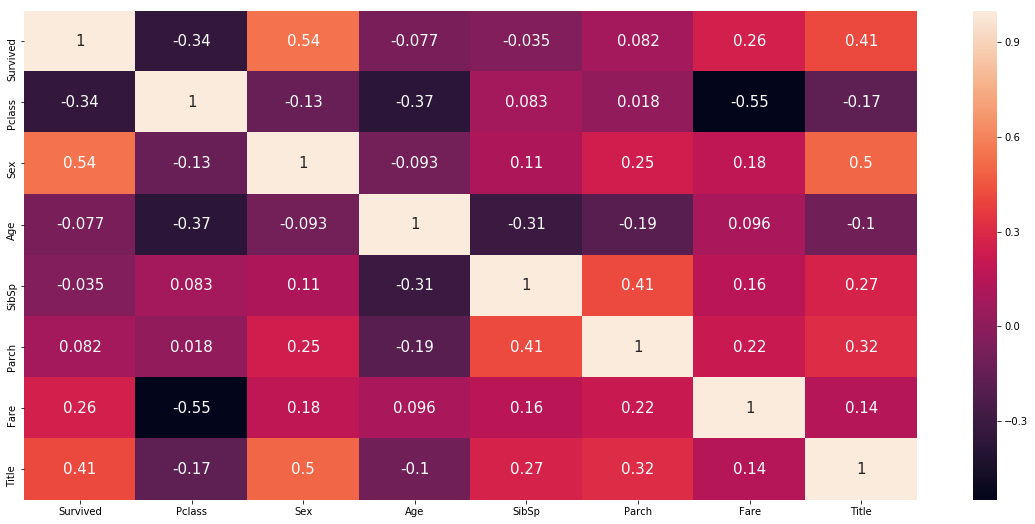

In [45]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr,  annot=True,annot_kws={'size': 15})

In [46]:
s = corr.unstack()
s

Survived  Survived    1.000000
          Pclass     -0.338481
          Sex         0.543351
          Age        -0.077221
          SibSp      -0.035322
                        ...   
Title     Age        -0.104766
          SibSp       0.269623
          Parch       0.315784
          Fare        0.136310
          Title       1.000000
Length: 64, dtype: float64

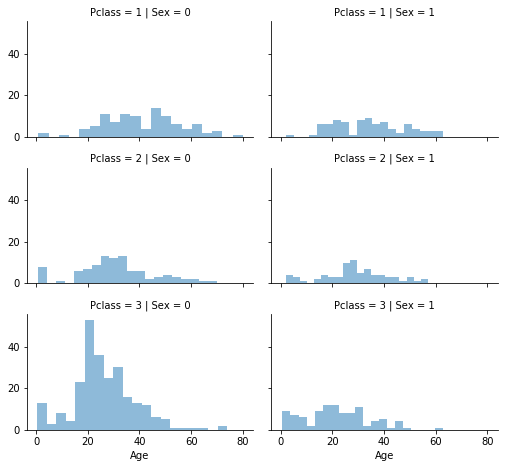

In [47]:
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [48]:
# Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [49]:
# Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

           
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)


In [50]:

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [51]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [52]:
# Let us create Age group and determine correlations with Survived.

train_data['AgeGroup'] = pd.cut(train_data['Age'], 5)
train_data[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean().sort_values(by='AgeGroup', ascending=True)

,AgeGroup,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [53]:
# Let us replace Age with ordinals based on these groups.

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']


In [54]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [55]:
# Now removing agegroup as its not required after converting age into different groups
train_data = train_data.drop(['AgeGroup'], axis=1)
combine = [train_data, test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Create new feature combining existing features(Parch & SibSp)
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [56]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [57]:
# We can create another feature called IsAlone.

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [58]:
# Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

train_data = train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_data, test_data]



In [59]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [60]:
# We can also create an artificial feature combining Pclass and Age.

for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [61]:
# Completing a categorical feature
# Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [62]:
 for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [63]:
train_data.isnull().sum()
# all missing value filled

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
Title        0
IsAlone      0
Age*Class    0
dtype: int64

In [64]:
# Converting categorical feature to numeric
# We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [65]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

In [66]:
# Filling missing vale in fare by median
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [67]:
train_data['FareGroup'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)

,FareGroup,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [68]:
# Convert the Fare feature to ordinal values based on the FareGroup.

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['FareGroup'], axis=1)
combine = [train_data, test_data]
    


In [69]:
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [70]:
test_data.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


# Algorithym application / Model Building

Now all data cleaning, wrangling part done. our data is ready to build model. as in this data we are trying to find out correlation of other feature with survived. and also training our model with training dataset. so its classification and regression problem.
So I will use some model app;ication on this dataset for checking which one is working better.

In [71]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# Logistic Regression

In [72]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.36

# Support Vector Machines


In [73]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.84

# KNN k-Nearest Neighbors algorithm 

In [74]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

# Gaussian Naive Bayes

In [75]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

# Decision Tree

In [76]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

# Random Forest

In [77]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

# Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem.

In [78]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN', 
              'Naive Bayes', 'Decision Tree','Random Forest'], 
             
    'Score': [acc_log,acc_svc, acc_knn,  acc_gaussian, 
              acc_decision_tree,acc_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,86.76
5,Random Forest,86.76
2,KNN,84.74
1,Support Vector Machines,83.84
0,Logistic Regression,80.36
3,Naive Bayes,72.28


In [79]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })


In [80]:
 submission.to_csv('/kaggle/working/submission.csv', index=False)  